##  Travel Package Purchase Prediction 

**Background and Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Objective

To predict which customer is more likely to purchase the newly introduced travel package.

**Data Dictionary**

Customer details:

* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living * standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

**Customer interaction data:** 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer



**Problem**

* To predict which customer is more likely to purchase the newly introduced travel package
* Which variables are most significant.
* Which segment of customers should be targeted more.

## Libraries

In [59]:
import scipy.stats as stats 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

from sklearn import metrics

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression

# Libtune to tune model, get different metric scores

from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix #to plot confusion matric

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')
# For pandas profiling
from pandas_profiling import ProfileReport

**Understand the dataset**

In [60]:
tour_df= pd.read_excel("Tourism.xlsx", sheet_name='Tourism') 
#creditData = pd.read_csv("credit.csv")
tour_df.head(10) #several missing values!

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,NaN,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000
5,200005,0,32.00000,Company Invited,1,8.00000,Salaried,Male,3,3.00000,Basic,3.00000,Single,1.00000,0,5,1,1.00000,Executive,18068.00000
6,200006,0,59.00000,Self Enquiry,1,9.00000,Small Business,Female,2,2.00000,Basic,5.00000,Divorced,5.00000,1,2,1,1.00000,Executive,17670.00000
7,200007,0,30.00000,Self Enquiry,1,30.00000,Salaried,Male,3,3.00000,Basic,3.00000,Married,2.00000,0,2,0,1.00000,Executive,17693.00000
8,200008,0,38.00000,Company Invited,1,29.00000,Salaried,Male,2,4.00000,Standard,3.00000,Unmarried,1.00000,0,3,0,0.00000,Senior Manager,24526.00000
9,200009,0,36.00000,Self Enquiry,1,33.00000,Small Business,Male,3,3.00000,Deluxe,3.00000,Divorced,7.00000,0,3,1,0.00000,Manager,20237.00000


In [61]:
tour_df.shape

(4888, 20)

In [62]:
tour_df['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [63]:
tour_df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.00000,4888.00000,4662.00000,4888.00000,4637.00000,4888.00000,4843.00000,4862.00000,4748.00000,4888.00000,4888.00000,4888.00000,4822.00000,4655.00000
mean,202443.50000,0.18822,37.62227,1.65426,15.49083,2.90507,3.70845,3.58104,3.23652,0.29092,3.07815,0.62029,1.18727,23619.85349
std,1411.18839,0.39092,9.31639,0.91658,8.51964,0.72489,1.00251,0.79801,1.84902,0.45423,1.36579,0.48536,0.85786,5380.69836
min,200000.00000,0.00000,18.00000,1.00000,5.00000,1.00000,1.00000,3.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1000.00000
25%,201221.75000,0.00000,31.00000,1.00000,9.00000,2.00000,3.00000,3.00000,2.00000,0.00000,2.00000,0.00000,1.00000,20346.00000
50%,202443.50000,0.00000,36.00000,1.00000,13.00000,3.00000,4.00000,3.00000,3.00000,0.00000,3.00000,1.00000,1.00000,22347.00000
75%,203665.25000,0.00000,44.00000,3.00000,20.00000,3.00000,4.00000,4.00000,4.00000,1.00000,4.00000,1.00000,2.00000,25571.00000
max,204887.00000,1.00000,61.00000,3.00000,127.00000,5.00000,6.00000,5.00000,22.00000,1.00000,5.00000,1.00000,3.00000,98678.00000


In [66]:
tour_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4888 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Check missing values**

In [64]:
print ("#"*40,"\nMissing values :\n\n", tour_df.isnull().sum().sort_values(ascending=False))

print( "#"*40,"\nPercent of missing :\n\n", round(tour_df.isna().sum() / tour_df.isna().count() * 100, 2).sort_values(ascending=False)) # looking at columns with most Missing Values


######################################## 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64
######################################## 
Percent of missing :

 DurationOfPitch            5.14000
MonthlyIncome              4.77000
Age                        4.62000
NumberOfTrips              2.86000
NumberOfChildrenVisiting   1.35000
NumberOfFollowups          0.92000
PreferredPr

**Missing Value Treatment**

Now let's impute missing values based on Mode, Median values - which seems reanable to the group.

In [69]:
tour_df['TypeofContact'].mode()
tour_df['TypeofContact']=tour_df['TypeofContact'].fillna('Self Enquiry')

In [70]:
tour_df['NumberOfFollowups']=tour_df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [71]:
tour_df['PreferredPropertyStar']=tour_df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [72]:
tour_df["DurationOfPitch"] = tour_df.groupby(["ProductPitched"])["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))

In [73]:
tour_df["NumberOfTrips"] = tour_df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))

In [74]:
tour_df['NumberOfChildrenVisiting']=tour_df['NumberOfChildrenVisiting'].fillna(0)

In [75]:
tour_df["Age"] = tour_df.groupby(["Gender","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

In [76]:
tour_df["MonthlyIncome"]=tour_df.groupby(["Occupation",'Designation'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [77]:
tour_df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

**Observations**

Missing values observed in the data

* NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values
* 5% values are missing in DurationOfPitch, that may be cause customer was never pitched, need to analyze further
* 4.77% values are missig from MonthlyIncome.
* Age has 4.62 % missing values.
* ProdTaken is the Target Variable
* Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, 
* Occupation,Type of Contact are categorical variables while others are numerical value.


**convert the columns with an 'object' datatype into categorical variables - to save some memory**

In [78]:
for feature in tour_df.columns: # Loop through all columns in the dataframe
    if tour_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        tour_df[feature] = pd.Categorical(tour_df[feature])# Replace strings with an integer
tour_df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.00000,Self Enquiry,3,6.00000,Salaried,Female,3,3.00000,Deluxe,3.00000,Single,1.00000,1,2,1,0.00000,Manager,20993.00000
1,200001,0,49.00000,Company Invited,1,14.00000,Salaried,Male,3,4.00000,Deluxe,4.00000,Divorced,2.00000,0,3,1,2.00000,Manager,20130.00000
2,200002,1,37.00000,Self Enquiry,1,8.00000,Free Lancer,Male,3,4.00000,Basic,3.00000,Single,7.00000,1,3,0,0.00000,Executive,17090.00000
3,200003,0,33.00000,Company Invited,1,9.00000,Salaried,Female,2,3.00000,Basic,3.00000,Divorced,2.00000,1,5,1,1.00000,Executive,17909.00000
4,200004,0,36.00000,Self Enquiry,1,8.00000,Small Business,Male,2,3.00000,Basic,4.00000,Divorced,1.00000,0,5,1,0.00000,Executive,18468.00000
5,200005,0,32.00000,Company Invited,1,8.00000,Salaried,Male,3,3.00000,Basic,3.00000,Single,1.00000,0,5,1,1.00000,Executive,18068.00000
6,200006,0,59.00000,Self Enquiry,1,9.00000,Small Business,Female,2,2.00000,Basic,5.00000,Divorced,5.00000,1,2,1,1.00000,Executive,17670.00000
7,200007,0,30.00000,Self Enquiry,1,30.00000,Salaried,Male,3,3.00000,Basic,3.00000,Married,2.00000,0,2,0,1.00000,Executive,17693.00000
8,200008,0,38.00000,Company Invited,1,29.00000,Salaried,Male,2,4.00000,Standard,3.00000,Unmarried,1.00000,0,3,0,0.00000,Senior Manager,24526.00000
9,200009,0,36.00000,Self Enquiry,1,33.00000,Small Business,Male,3,3.00000,Deluxe,3.00000,Divorced,7.00000,0,3,1,0.00000,Manager,20237.00000


In [79]:
# Drop 'CustomerID', not even important
tour_df.drop(['CustomerID'],axis=1,inplace=True)

In [80]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(tour_df[i].value_counts())
    print('*'*50)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
**************************************************
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
**************************************************
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
**************************************************
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in ProductPitched are :

* Female and Fe male are same category , Data needs to be fixed

In [81]:
tour_df['Gender'] = tour_df['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [82]:
tour_df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

* Converting the data type of categorical features to 'category'

In [83]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
tour_df[cat_cols] = tour_df[cat_cols].astype('category')
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [84]:
tour_df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


**Recode: Age and Income**

To understand customers segments derving new columns for Income and Age, will help us identify if customer in different Age and income ranges have some relationship with with our target variable ProdTaken.



In [85]:
tour_df['Income_rec'] = pd.cut(tour_df['MonthlyIncome'], bins = [0,20000, 30000,40000,50000,100000], labels = ['<20k', '20k-30k', '30k-40k','40k-50k ','50k+'])
tour_df['Age_rec'] = pd.cut(tour_df['Age'], bins = [18,25, 35, 45,55,65], labels = ['18-25','26-35', '36-45', '46-55', '55-65'])


In [86]:
print(tour_df.Age_rec.value_counts())
print(tour_df.Income_rec.value_counts())

26-35    1887
36-45    1680
46-55     774
18-25     333
55-65     200
Name: Age_rec, dtype: int64
20k-30k     3258
<20k        1040
30k-40k      588
50k+           2
40k-50k        0
Name: Income_rec, dtype: int64


## Exploratory Data Analysis


In [87]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="teal",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='purple',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

In [88]:
list_col=  tour_df.select_dtypes(include='number').columns.to_list()
list_col

['Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

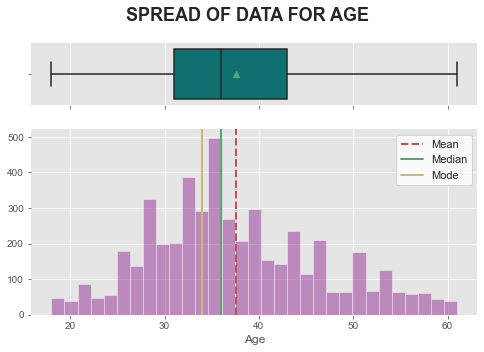

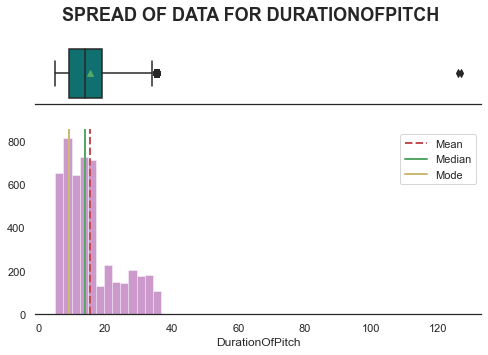

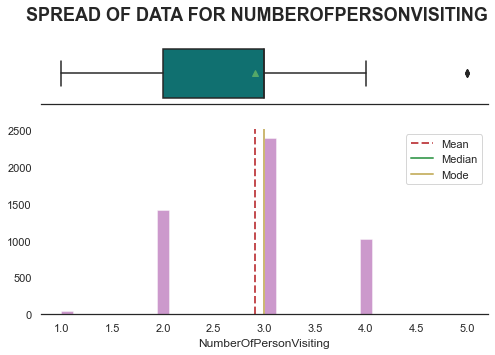

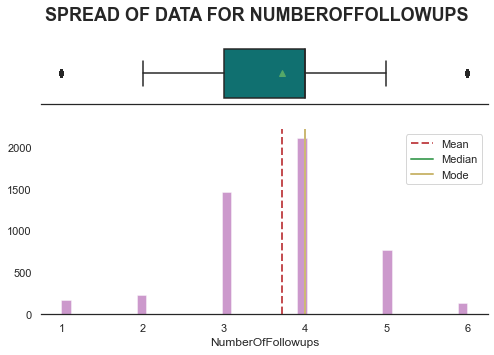

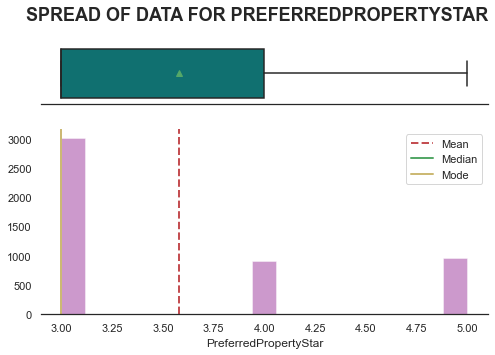

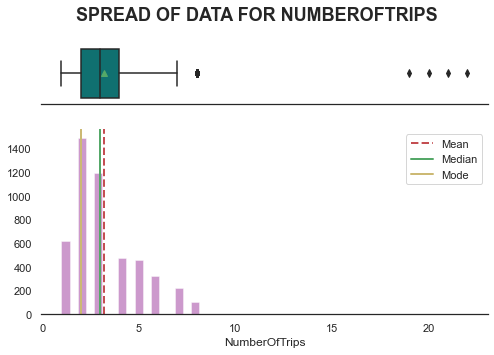

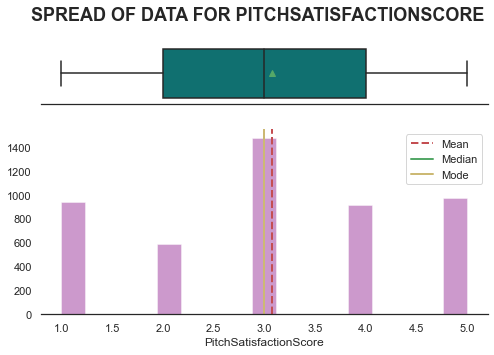

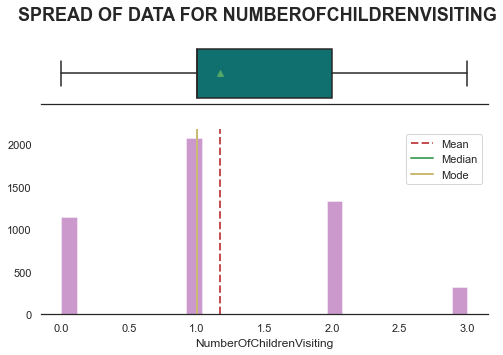

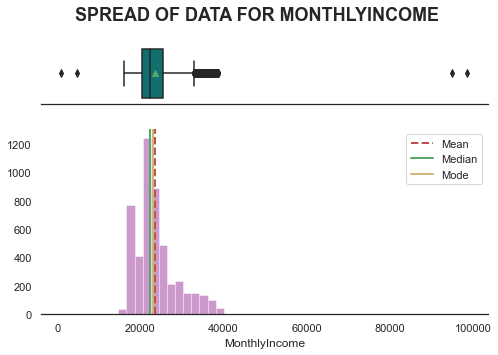

In [89]:
for i in range(len(list_col)):
    dist_box(tour_df[list_col[i]])

**Observations**
* Age is normally distrubted and doesn't have any outliers
* Duration of pitch is Right skewed with some outliers greater than 120.
* Average number of folowups are 4 with extreme of 6
* Number of trips is right skewed with some outliers where trips are greater than 17.
* Monthly income is Right skewed and has some outlier as higher end.
* Number of visitors is usually 3 with a outlier of 5.


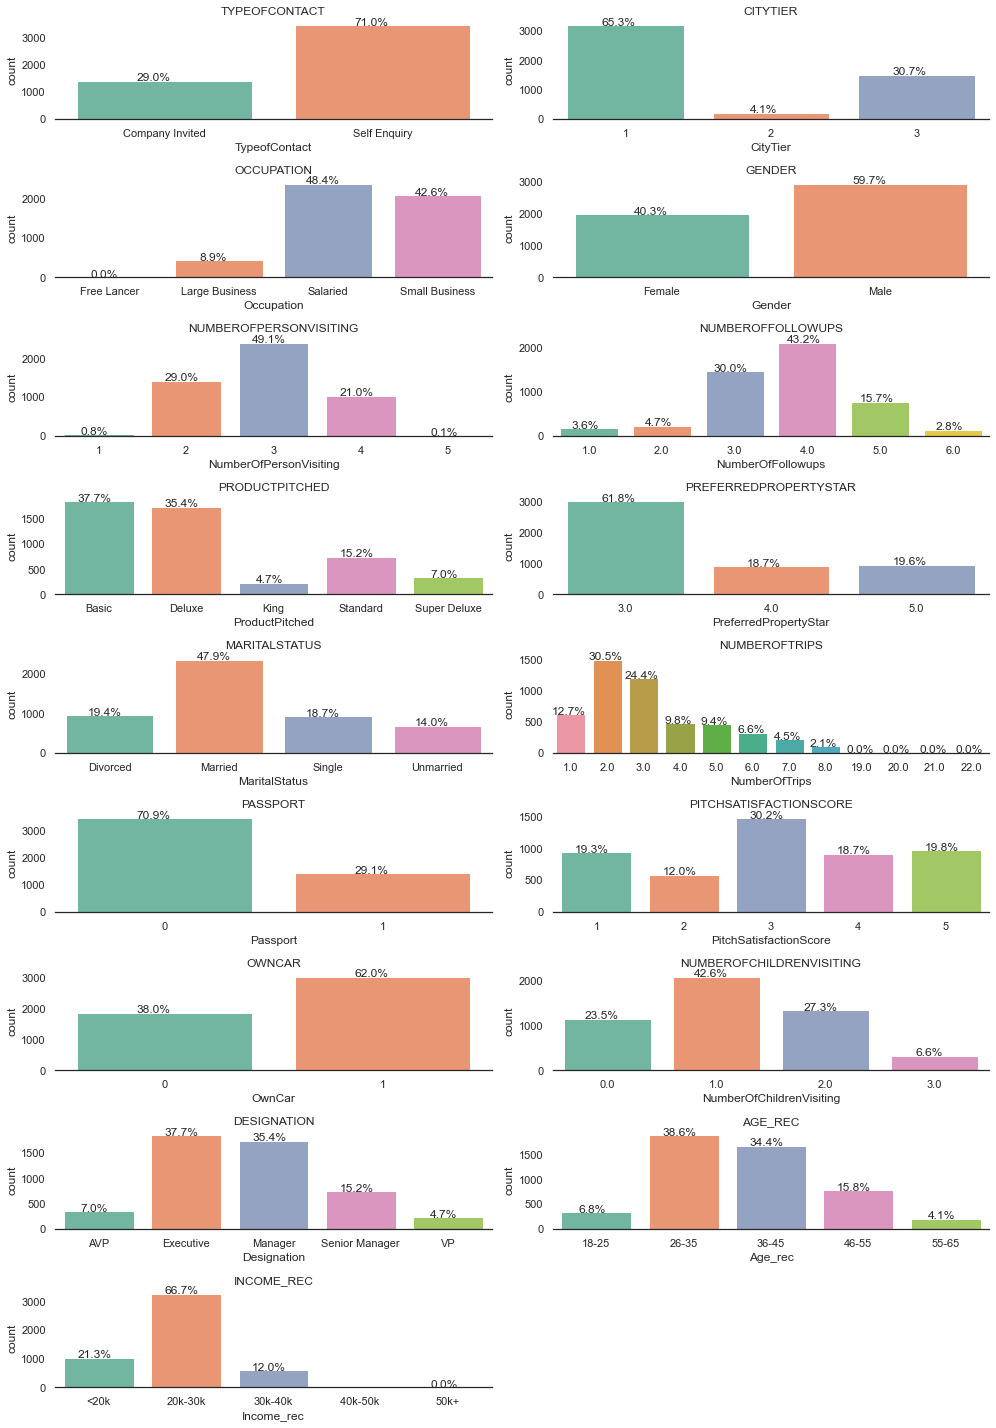

In [90]:
# Making a list of all categorical variables

plt.figure(figsize=(14,20))

sns.set_theme(style="white") 
cols=['TypeofContact', 'CityTier', 'Occupation', 'Gender',
        'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProductPitched', 
        'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips',
        'Passport', 'PitchSatisfactionScore',
        'OwnCar', 'NumberOfChildrenVisiting', 
        'Designation','Age_rec','Income_rec']
for i, variable in enumerate(cols):
                     plt.subplot(9,2,i+1)
                     order = tour_df[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=tour_df[variable], data=tour_df)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(tour_df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(cols[i].upper())
                                     


**Observations:**

* Majority of the customers have self-enquired (70.5%) for the package followed by a company invited (29%).
* Most of the customers are salaried (48.5%) followed by small business owners (42.6%).
* Most of the customers are male (59.7%)
* Most of the customers traveled along with 3 people
* Most of the customers pitched the Basic package (38%) followed by the Deluxe package (35.4%). 
* Most of the customers are Executives (38%) followed by Managerial designation (35.4%).
* Most of the customers are aged 26-35 (36.9%) followed by those aged 36- 45 (31.4%). Those aged 55-65 and 18-25 constitute 4.1% and 6.8% of the population only.
* Majority of the customers have 20k–30k (62%) gross monthly income, followed by <20k (21.3%) gross monthly income.

## Bivariate & Multivariate Analysis


## Split the data into train and test sets

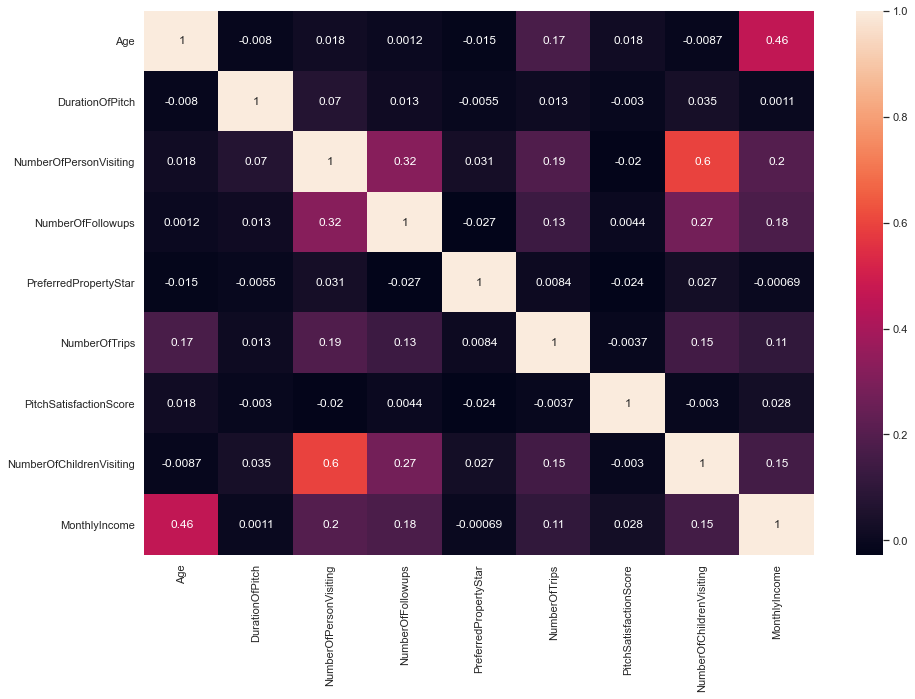

In [91]:
#sns.set_palette(sns.color_palette("bright", 10))
plt.figure(figsize=(15,10))
sns.heatmap(tour_df.corr(),annot=True)
plt.show()

**Observations:**

* Number of children visiting and number of person vsiting has correlation.
* A weak correlation also observed between Age and monthly income.
* No strong associations observed between other variables.
 


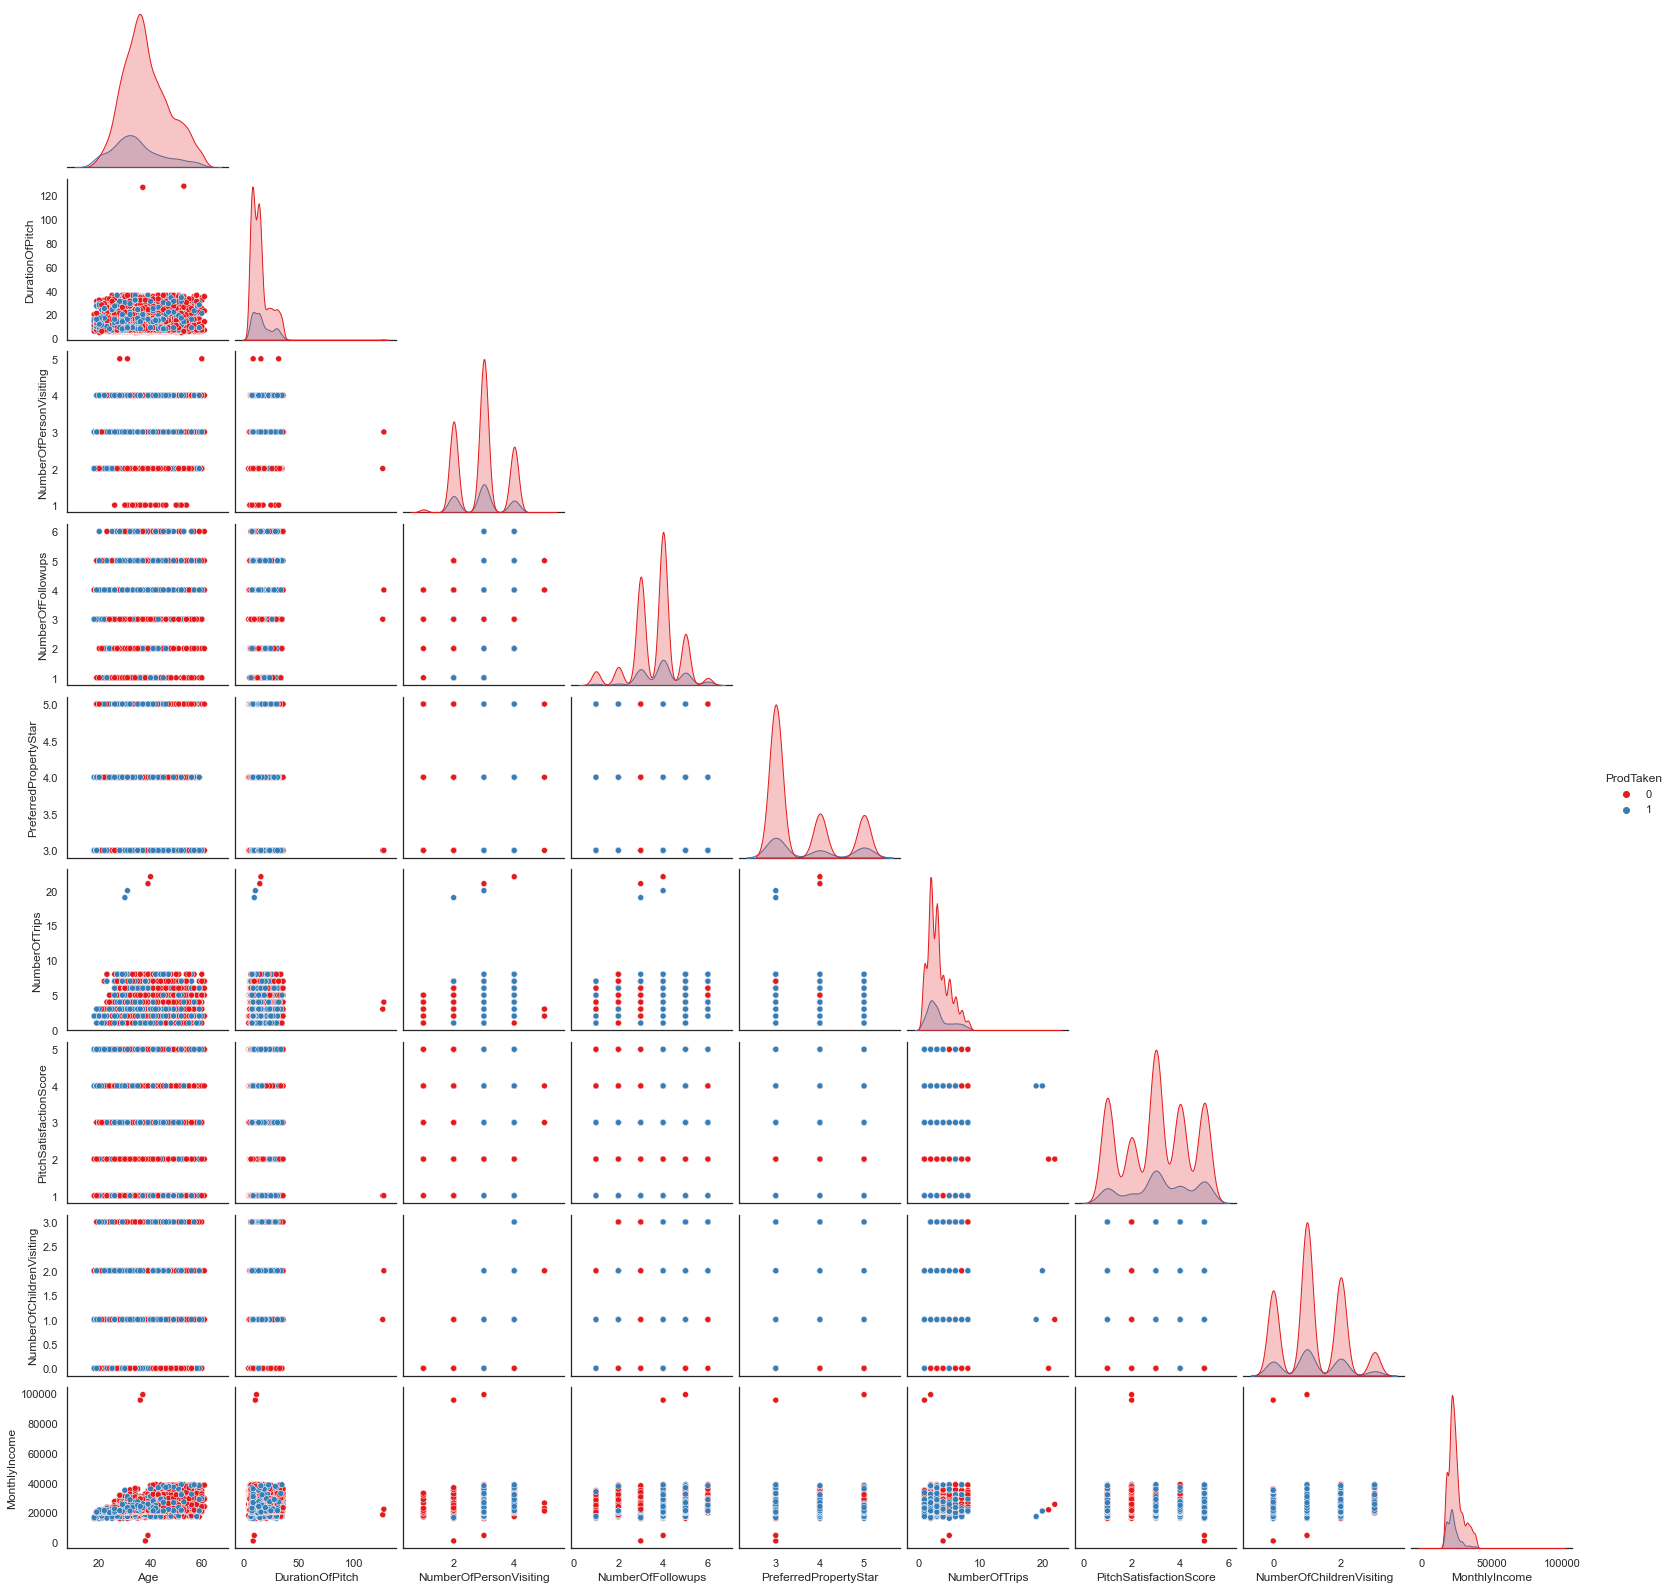

In [92]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(tour_df, hue="ProdTaken",corner=True)
plt.show()

In [93]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='ProdTaken'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title(f'Distribution of {x} \n of a customer who had Not taken Product',fontsize=12,fontweight='bold')
    sns.distplot(tour_df[(tour_df[target] == 0)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title(f"Distribution of {x}\n of a customer who had taken Product",fontsize=12,fontweight='bold')
    sns.distplot(tour_df[(tour_df[target] == 1)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title(f'Boxplot of {x} w.r.t Product taken',fontsize=12,fontweight='bold')
    
    line = plt.Line2D((.1,.9),(.5,.5), color='grey', linewidth=1.5,linestyle='--')
    fig.add_artist(line)
   
    sns.boxplot(tour_df[target],tour_df[x],ax=axs[1,0],palette='gist_rainbow',showmeans=True)
    axs[1,1].set_title(f'Boxplot of {x} w.r.t Product Taken - Without outliers',fontsize=12,fontweight='bold')
    sns.boxplot(tour_df[target],tour_df[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow',showmeans=True) #turning off outliers from boxplot
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    plt.tight_layout(pad=4)
    plt.show()

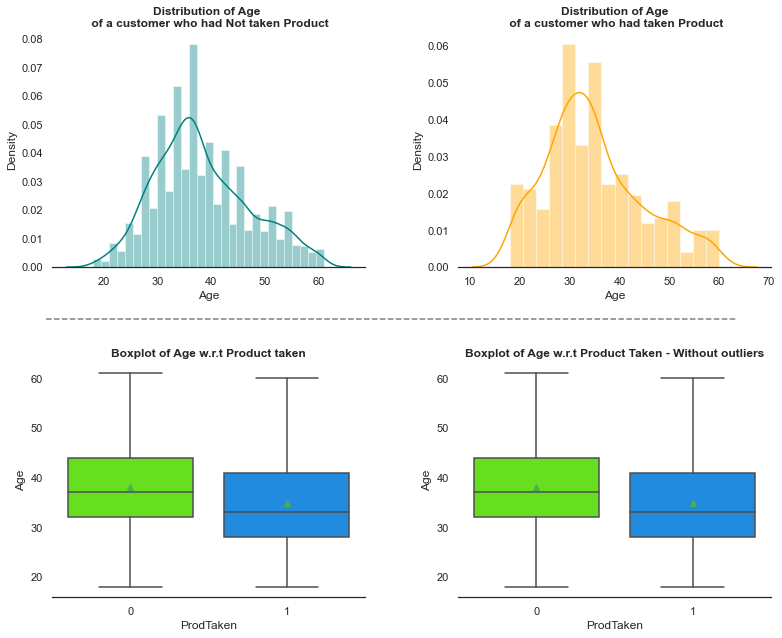

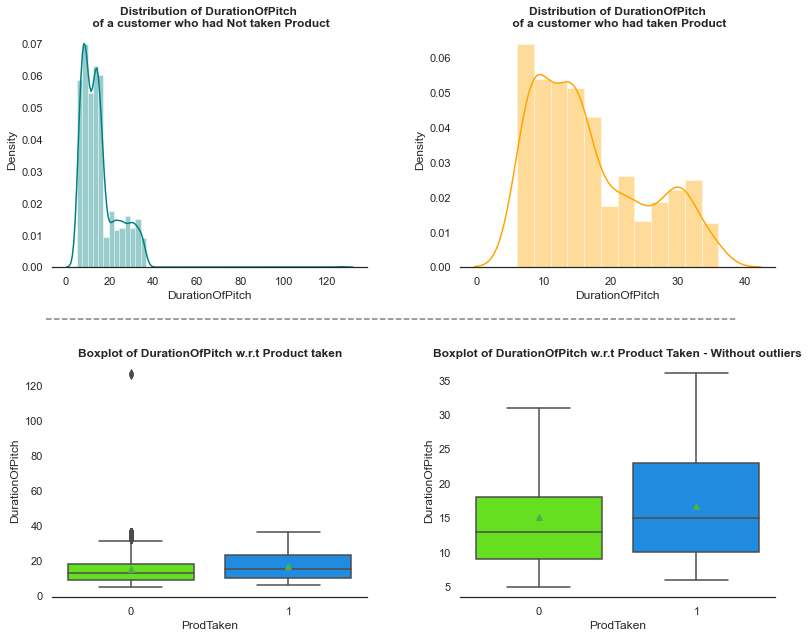

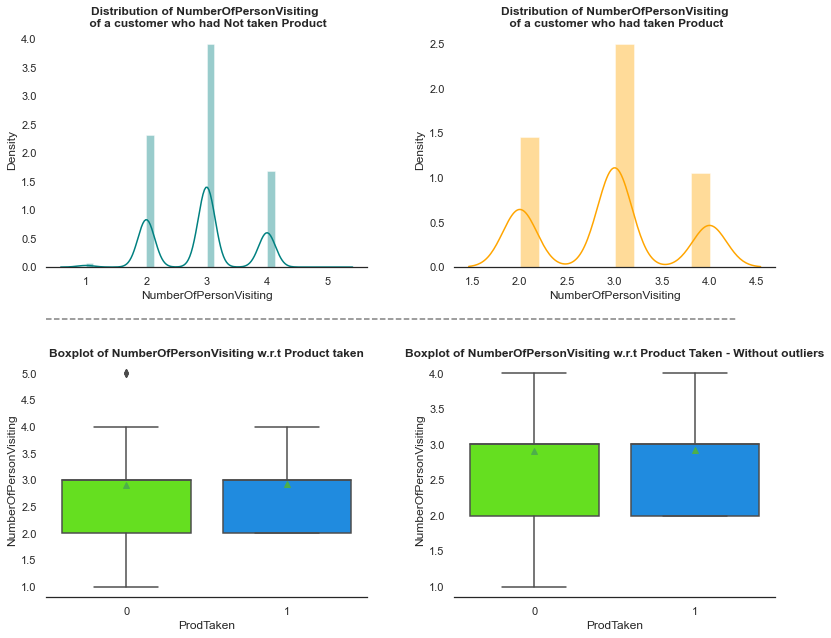

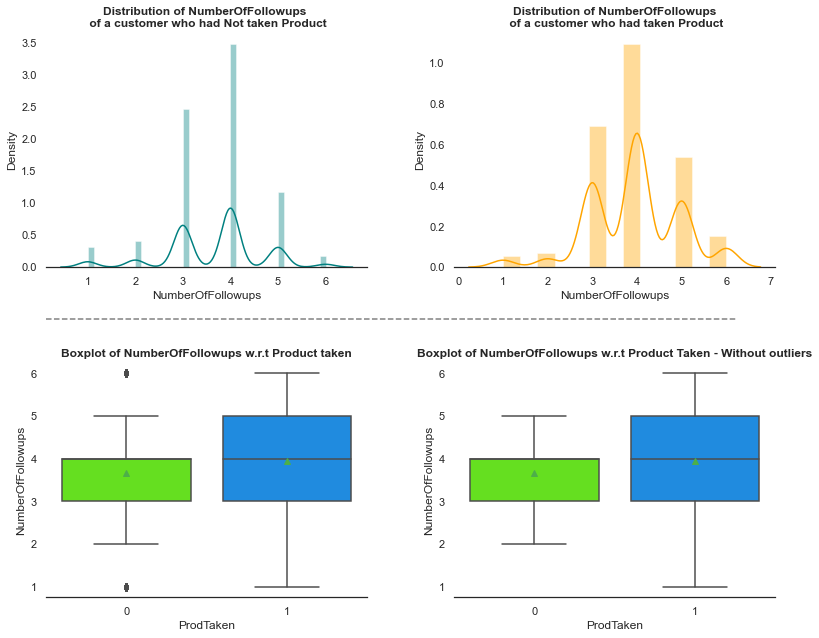

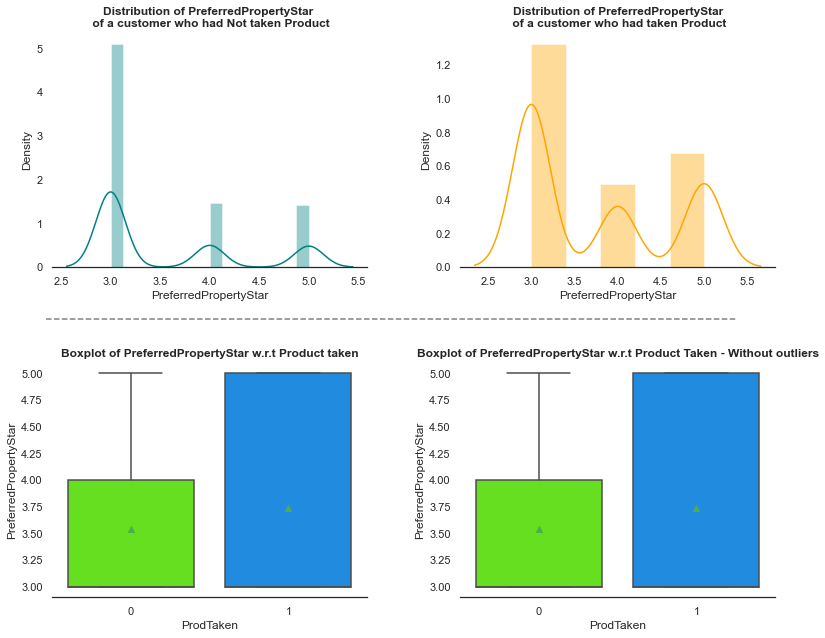

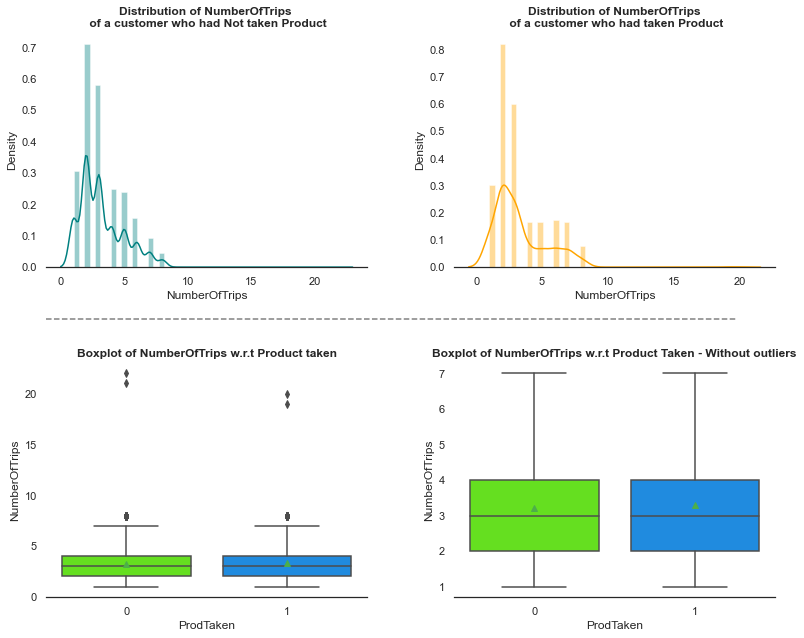

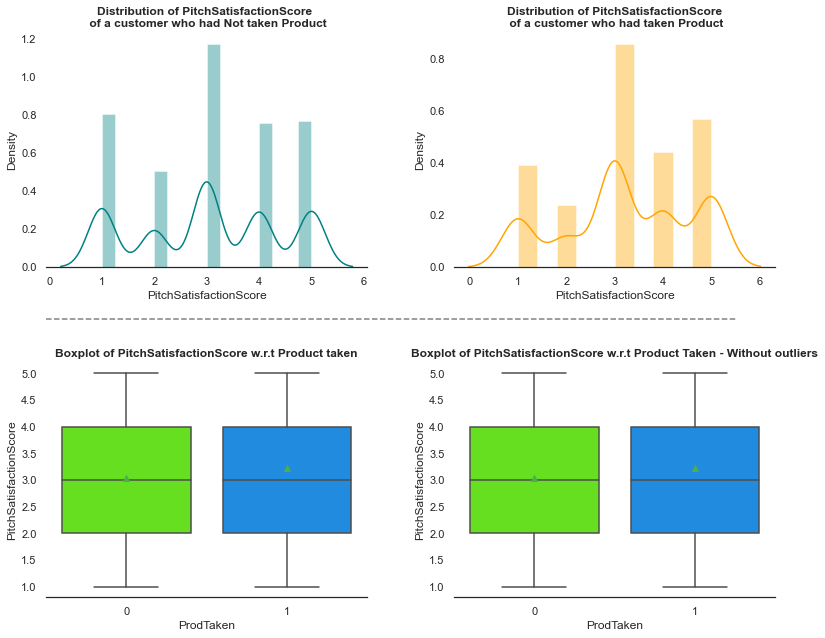

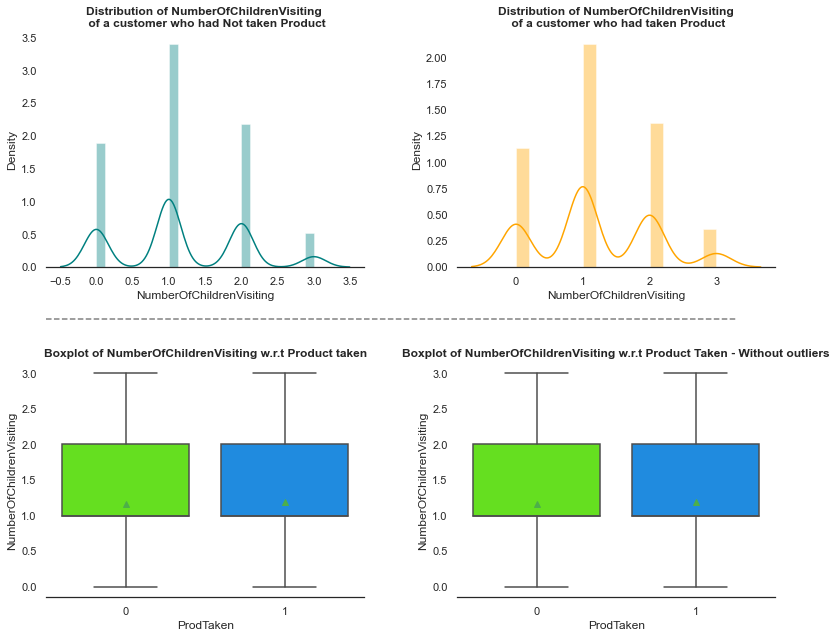

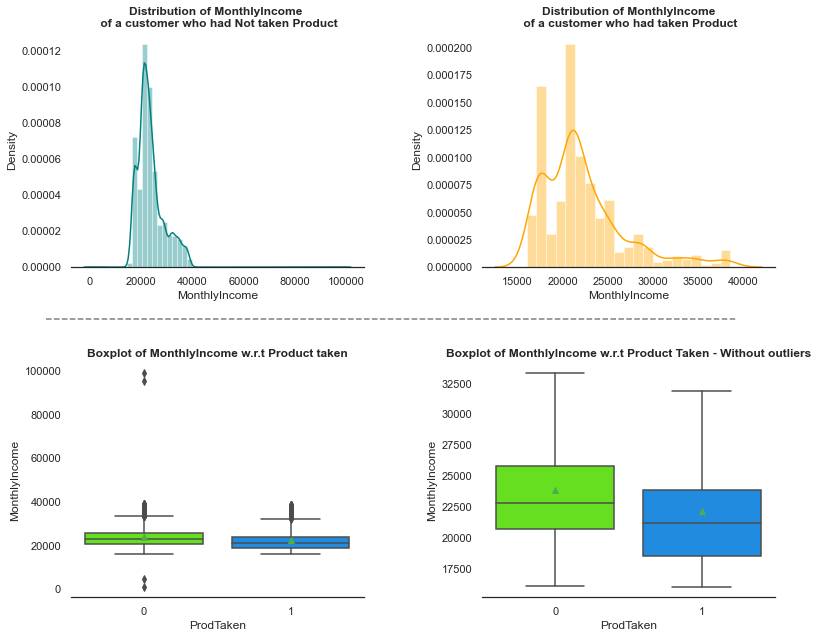

In [94]:
#select all quantitative columns for checking the spread
#list_col=  ['Age','DurationOfPitch','MonthlyIncome']
list_col=tour_df.select_dtypes(include='number').columns.to_list()
#print(list_col)
#plt.figure(figsize=(14,23))
for j in range(len(list_col)):
   plot(list_col[j])
   

**Observation:**
* Customers who purchased a product have taken 2-4 trips, the average number of trips that customers taken is 3, but number of trips has some outliers.
* Customers who purchased the product are mostly in age range of 28-35.
*  Customers who purchased product are in earning an average monthly of (18k-23k)

In [95]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,tour_df['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,tour_df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


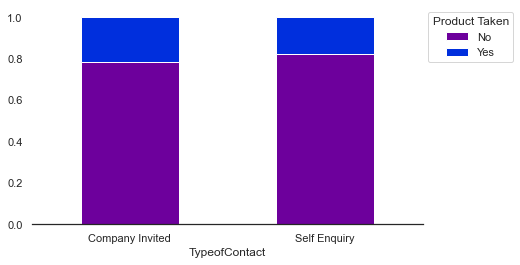

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


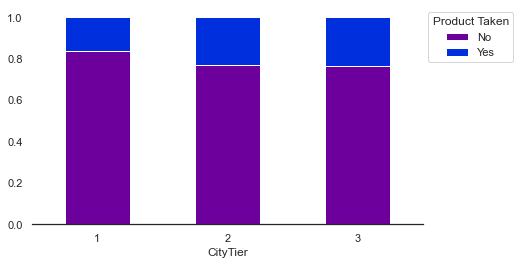

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


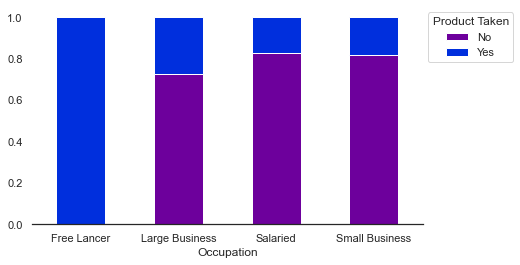

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


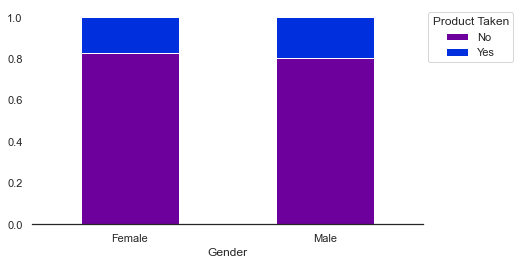

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


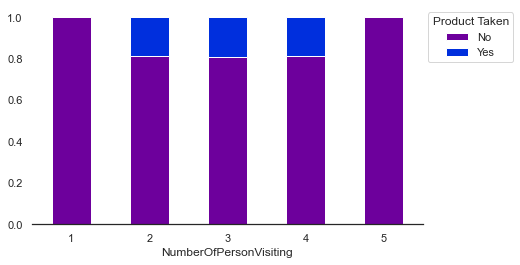

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


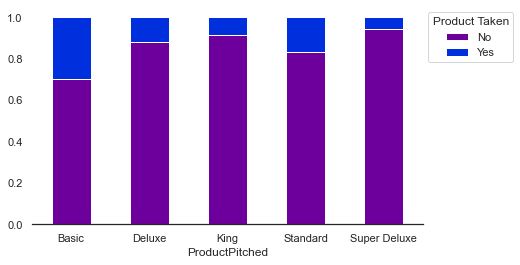

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


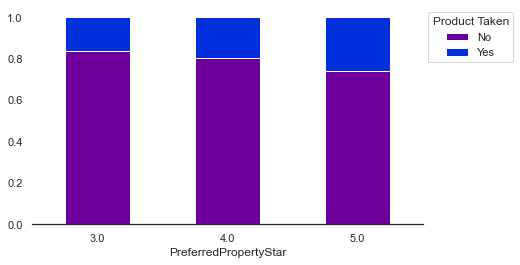

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1186  305  1491
3.0             969  223  1192
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


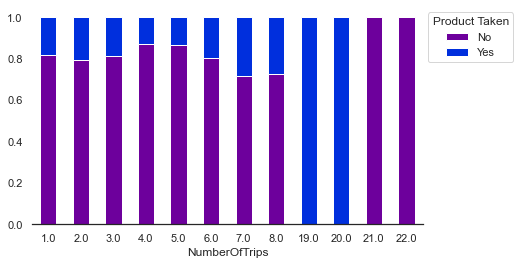

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


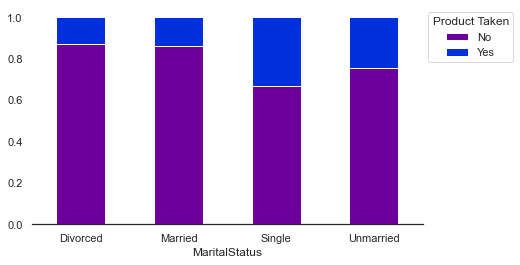

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


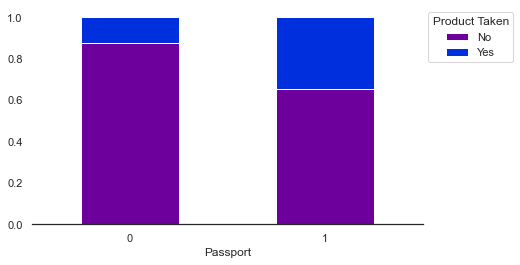

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


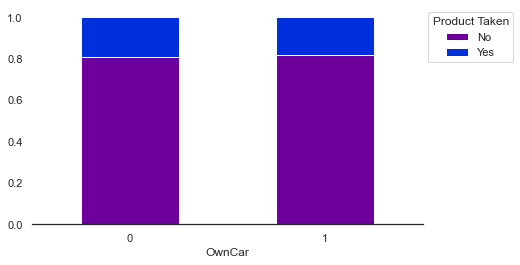

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


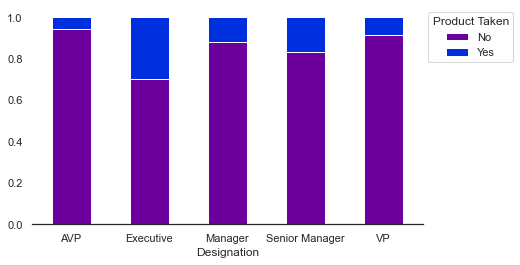

ProdTaken     0    1   All
Age_rec                   
18-25       198  135   333
26-35      1466  421  1887
36-45      1468  212  1680
46-55       671  103   774
55-65       159   41   200
All        3962  912  4874
------------------------------------------------------------------------------------------------------------------------


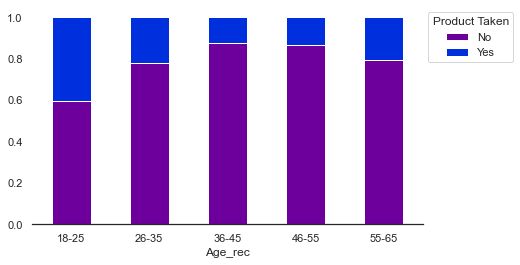

ProdTaken      0    1   All
Income_rec                 
<20k         756  284  1040
20k-30k     2682  576  3258
30k-40k      528   60   588
50k+           2    0     2
All         3968  920  4888
------------------------------------------------------------------------------------------------------------------------


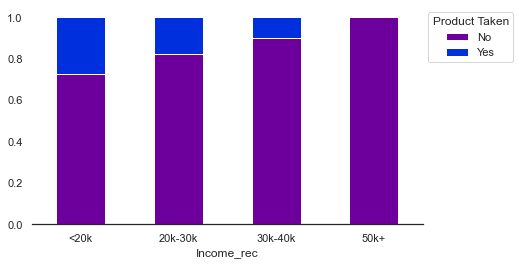

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


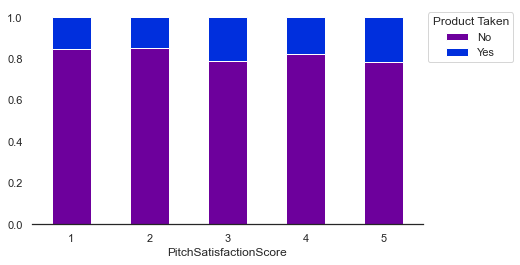

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


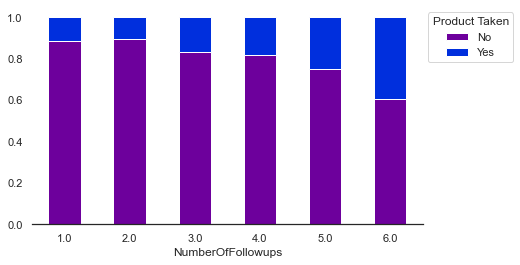

In [96]:
list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
              'ProductPitched','PreferredPropertyStar','NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','Age_rec','Income_rec','PitchSatisfactionScore','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(tour_df[variable])

**Observations:**

* single and unmarried people has higher chance of purchasing the travel package.
* Having a passport increased chnaces of purchasing the package.
* Customers with monthly salary <20k purchased product followed by customers in income range 20k-30k.
* Single and unmarried people has higher chance of purchasing the travel package.
* Customers mostly purchased packages are mostly 5 star followed by 4 and 3 stars.
* Most of the customers who purchased a product pitched Basic Product followed by Standard and Deluxe. King and Super Deluxe are the least pitched products.
* Customers with 2,3,4 visits purchased the product.
* Litte/no variaton observed between Male and Female in purchasing a product.
* Free Lancers and Large Business owners have higher chance of purchasing the travel package.
* Customers who purchased a product are mostly from City tiers 2 and 3.

In [97]:
tour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4888 non-null   float64 
 2   TypeofContact             4888 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4888 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4888 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4888 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4888 non-null   float64 
 13  Passport                  4888 non-null   catego

In [98]:
np.isnan(tour_df.any()) #and gets False
np.isfinite(tour_df.all()) #and gets True

Age                         True
DurationOfPitch             True
NumberOfPersonVisiting      True
NumberOfFollowups           True
PreferredPropertyStar       True
NumberOfTrips               True
PitchSatisfactionScore      True
NumberOfChildrenVisiting    True
MonthlyIncome               True
dtype: bool

## Model Building

## Split the dataset


* I dropped Age and Income original variables, since these columns are already recoded and incorporated. 

In [99]:
# Separating target column
X = tour_df.drop(['ProdTaken', 'Age','MonthlyIncome'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = tour_df['ProdTaken']

In [100]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3421, 35), (1467, 35))

## Building the model
- We are going to build 3 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

In [101]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [102]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

# Model building - Bagging

## Decision Tree Model

In [103]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [104]:
dtree_score=get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8984321745057942
Recall on training set :  1.0
Recall on test set :  0.7282608695652174
Precision on training set :  1.0
Precision on test set :  0.730909090909091


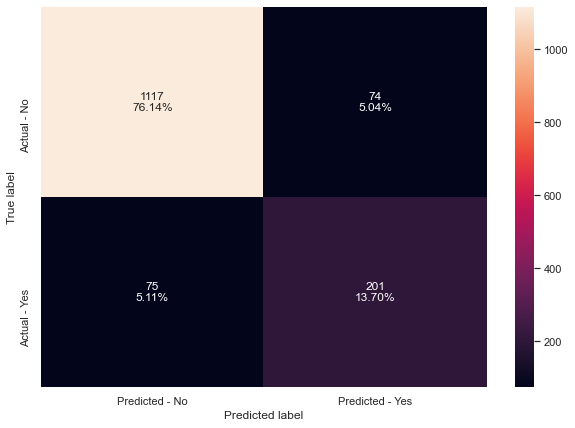

In [105]:
make_confusion_matrix(dtree,y_test)

Observation:    
    - The Decision tree model with default parameters is overfitting the train data.


## Random Forest Model

In [106]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [107]:
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9154737559645535
Recall on training set :  1.0
Recall on test set :  0.5905797101449275
Precision on training set :  1.0
Precision on test set :  0.9367816091954023


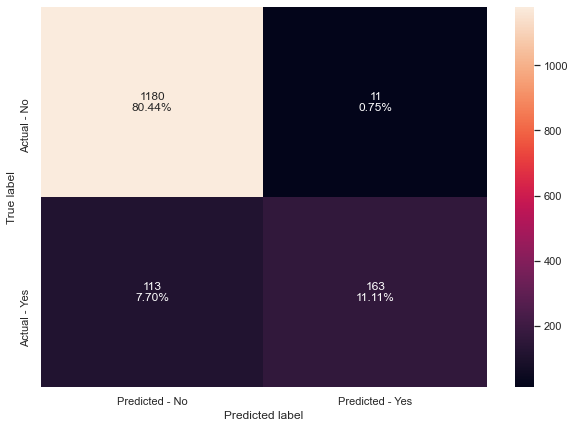

In [108]:
make_confusion_matrix(rf,y_test)

Observation:    
    - The Random Forest model with default parameters is overfitting the train data.

## Bagging Classifier Model

In [109]:
bg = BaggingClassifier(random_state=1)
bg.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [110]:
bg_score=get_metrics_score(bg)

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.9113837764144512
Recall on training set :  0.9751552795031055
Recall on test set :  0.6195652173913043
Precision on training set :  0.9968253968253968
Precision on test set :  0.8724489795918368


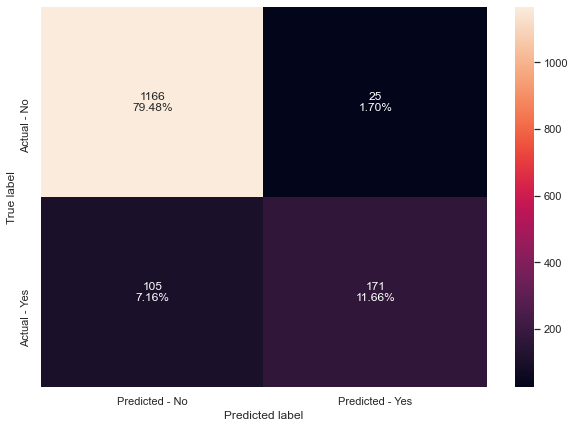

In [111]:
make_confusion_matrix(bg,y_test)

Observation:    
    - The Bagging classifier model with default parameters also showed overfitting on the train data.
   

## Bagging Classifiers with default parameters: Summary

 **With default parameters:**
- All the above baggging models (Decision Tree, Random Forest and Bagging Classifiers) showed overfitting on the train data.
- Decision Tree Model has the least test accuracy but better Test recall among these three models.
- Random Forest classifier has better test accuracy but the least test recall among the three models.

# Model building - Boosting

### AdaBoost Classifier

In [113]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [117]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8418591055247003
Accuracy on test set :  0.8425357873210634
Recall on training set :  0.3136645962732919
Recall on test set :  0.2971014492753623
Precision on training set :  0.6710963455149501
Precision on test set :  0.6890756302521008


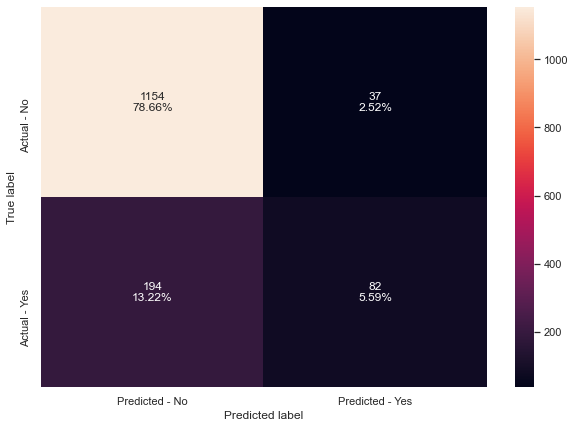

In [118]:
make_confusion_matrix(abc,y_test)

**Observation:**
- The adaboost classifier showed no overfitting on the trainig data, which is a good news.
- But the accuracy (84%) look a little bit lower than compared to others.
- Very low test recall on both the training and testing data. 

### Gradient Boosting Classifier

In [119]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [221]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8795673779596609
Accuracy on test set :  0.8561690524880708
Recall on training set :  0.4254658385093168
Recall on test set :  0.35144927536231885
Precision on training set :  0.8670886075949367
Precision on test set :  0.751937984496124


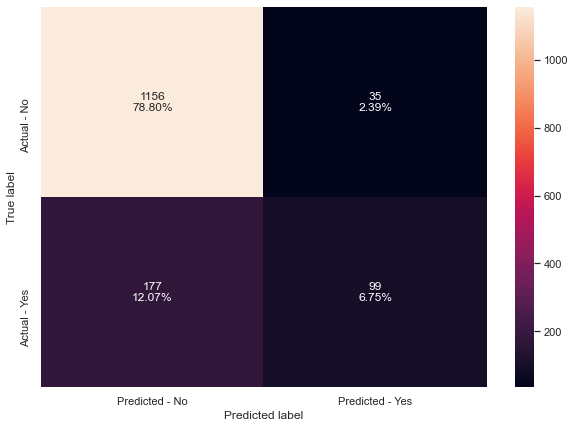

In [120]:
make_confusion_matrix(gbc,y_test)

**Observation:**
- The gradient boost classifier showed no overfitting on the trainig data, which is a good news.
- But the accuracy (85.6%) on the test data look also fine, a little bit better than the adaboost classifier.
- Very low test recall on both the training and testing data, but a little bit better than the adaboost classifier. 

### XGBoost Classifier

In [121]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [122]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9982461268634902
Accuracy on test set :  0.9318336741649625
Recall on training set :  0.9906832298136646
Recall on test set :  0.7681159420289855
Precision on training set :  1.0
Precision on test set :  0.8548387096774194


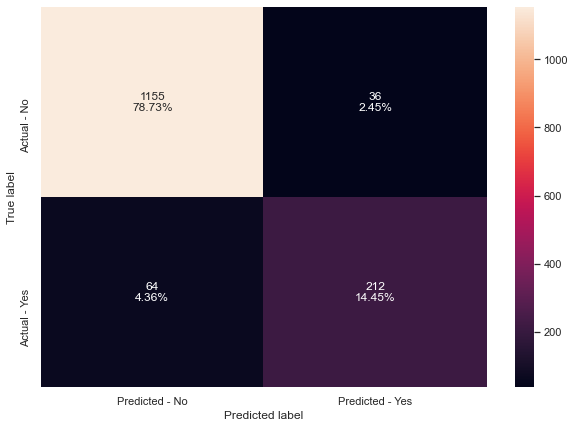

In [123]:
make_confusion_matrix(xgb,y_test)

**Observation:**
- The Extreme gradient boost classifier showed a litle bit overfitting on the trainig data.
- But the accuracy (93%) higher than all other classifiers.
- Relatively higher test recall on both the training and testing data. Much better than both the adaboost and gradient boosting classifiers. 

### Stacking Classifier

In [128]:
estimators=[('Ada Boost', abc),('Gardient Boosting', gbc)]
final_estimator=xgb

In [135]:
stacking=StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stacking.fit(X_train,y_train)

StackingClassifier(estimators=[('Ada Boost',
                                AdaBoostClassifier(random_state=1)),
                               ('Gardient Boosting',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=1,
                                                 enable_categorical=False,
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 le

In [136]:
stacking_score=get_metrics_score(stacking)

Accuracy on training set :  0.8634902075416545
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.4720496894409938
Recall on test set :  0.4057971014492754
Precision on training set :  0.7053364269141531
Precision on test set :  0.64


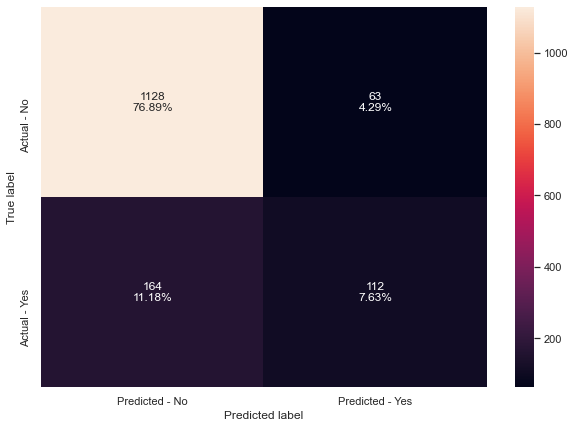

In [137]:
make_confusion_matrix(stacking,y_test)

**With default parameters:**
- Stacking classifier showed no overfitting on the testing data.
- But, the accuracy on the testing data was lower than other classifiers.
- The recall values on both the testing and training data is also very low.

## Boosting Classifiers with default parameters: Summary

**With default parameters:**

- With  the exception of Extreme Gradient Boosting, all the above boosting models (Adaboost, Gradient Boosting and Stacking) classifiers showed no overfitting.
- Relatively lower test accuracy performance was obesrved on these models. 
- Lower test recall performance was observed on the abover models ((Adaboost, Gradient Boosting and Stacking) classifiers 

- However, Extreme gradient boost (xgb) classifier even though it showed a litle bit of overfitting on the trainig data.
- The accuracy on the test data (93%) was higher than all other classifiers.
- And, test recall on both the training and testing data is relatively much higher than the rest of boosting classifers including stacking classifier. 

- Tunning of the xgb classifier might help to reduce overfitting. Check below.

# Model performance improvement - Boosting


## Hyperparameter Tuning

### AdaBoost Classifier

In [140]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.1, n_estimators=100, random_state=1)

In [141]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9710610932475884
Accuracy on test set :  0.874573960463531
Recall on training set :  0.8819875776397516
Recall on test set :  0.5905797101449275
Precision on training set :  0.961082910321489
Precision on test set :  0.6965811965811965


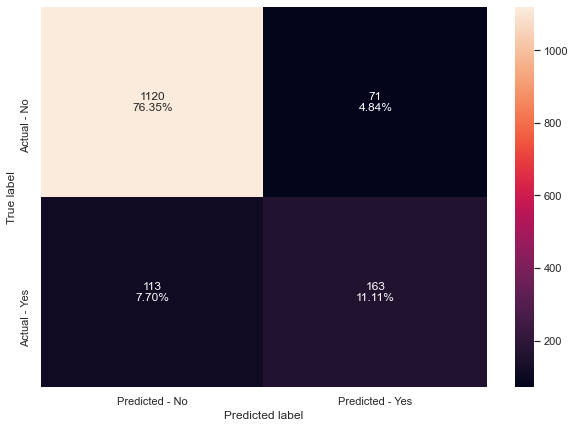

In [142]:
make_confusion_matrix(abc_tuned,y_test)

### Insights
- The model is overfitting the train data as train accuracy is higher than the test accuracy, even though much improvement observed compared to the default parameters.
- The model still has low test recall. This implies that the model is not good at identifying customers who purchased the package.


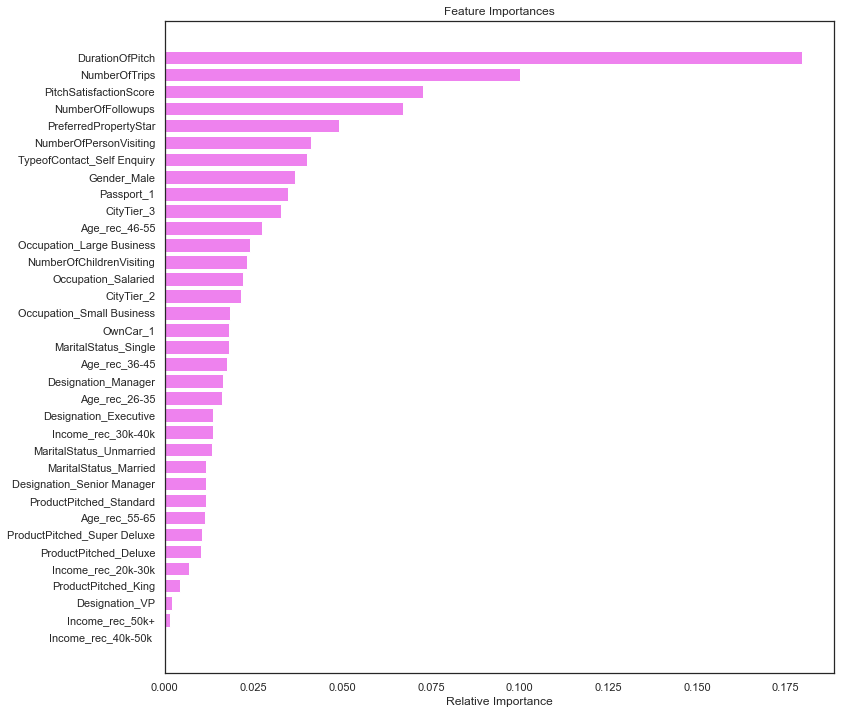

In [143]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- DurationOfPitch, NumberofTrips and PitchSatistisfactionScore are the most important feature as per the tuned AdaBoost model.

### Gradient Boosting Classifier

In [144]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [145]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9102601578485823
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.5838509316770186
Recall on test set :  0.47101449275362317
Precision on training set :  0.9060240963855422
Precision on test set :  0.7926829268292683


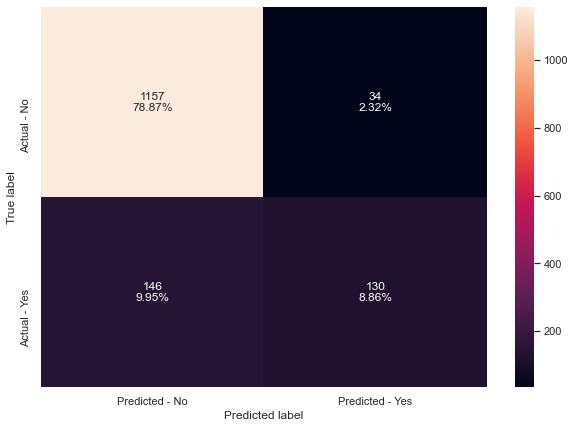

In [147]:
make_confusion_matrix(gbc_tuned,y_test)

### Insights
- The model performace has not increased by much, 
- But this model has no overfitting than the previous model (tunned adaboost).
- It is has very low test recall (47%). The model is not good at identifying customers who purchased the package.

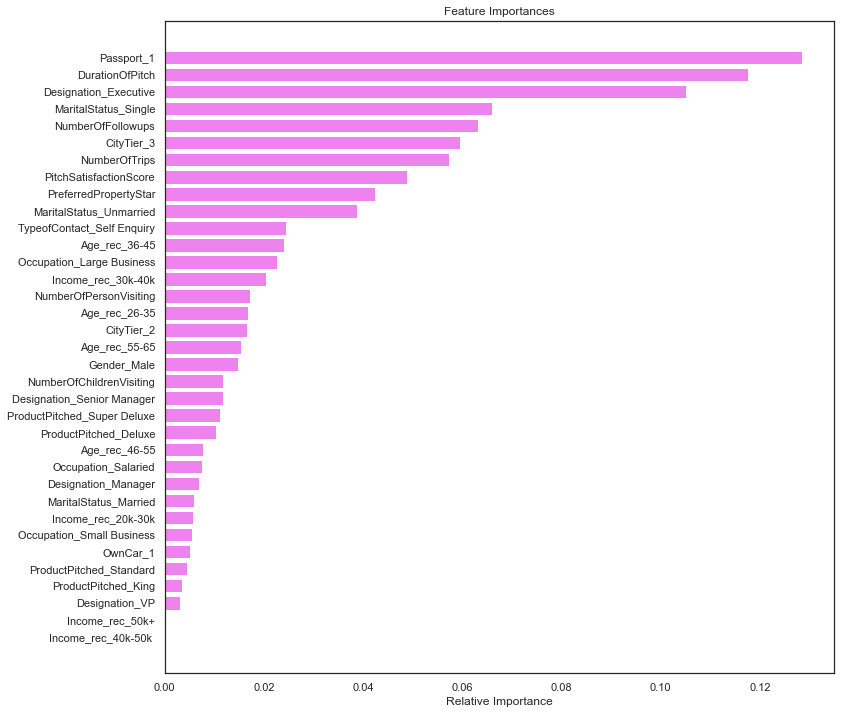

In [148]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport is the most important feature unlike adaboost model where DurationOfPitch is the most important varaible. DurationOfPitch and MaritalStatus_Single are the second and third important variables as per the tuned gradient boosting model.

### XGBoost Classifier

In [149]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [150]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9470914937152879
Accuracy on test set :  0.8895705521472392
Recall on training set :  0.9829192546583851
Recall on test set :  0.8442028985507246
Precision on training set :  0.788293897882939
Precision on test set :  0.6619318181818182


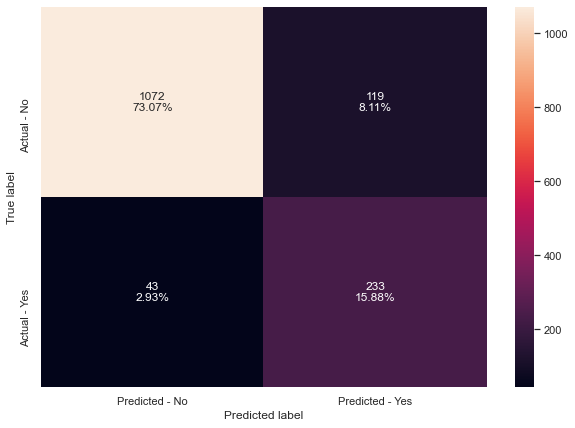

In [151]:
make_confusion_matrix(xgb_tuned,y_test)

### Insights
- The tuned model is not overfitting and generalizes well.
- The test accuracy of the model has reduced as compared to the model with default parameters but the recall has increased significantly and the model is able to identify most of the customers who purchase the package.
- Decreasing number of false negatives has increased the number of false positives here.

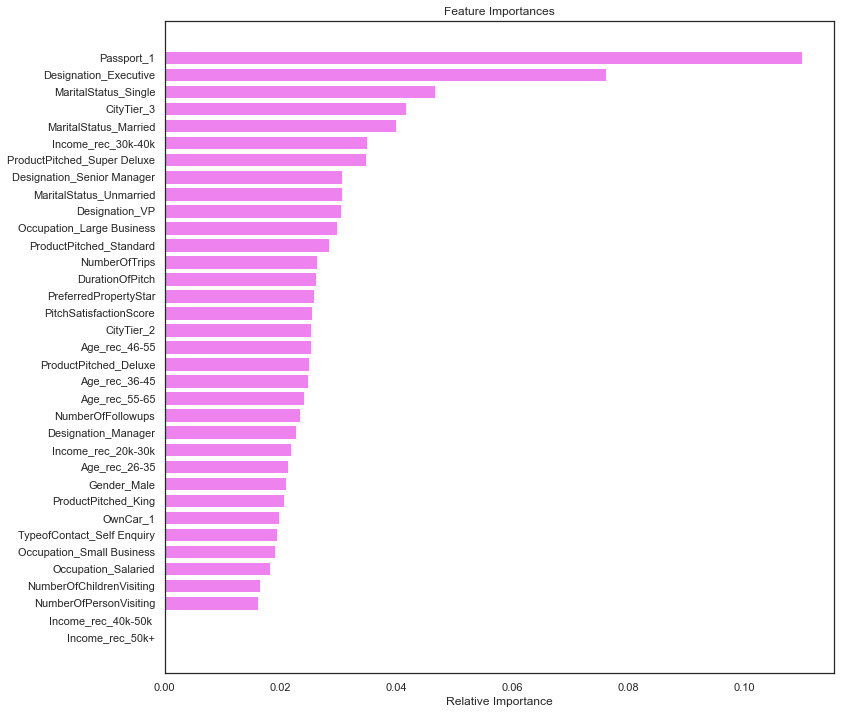

In [155]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Passport is the most important feature as per XGBoost model like the Gradient Boosting, followed by Designiation Executive and MaritalStatus_Single. Despite the first variable (Passport) is similar with gradient boosting model, the second and third important variables (esigniation Executive and MaritalStatus_Single) are different from both gradient boosting and adaboost models.

## Comparing all models

In [153]:
# defining list of models
models = [abc,gbc, xgb, stacking, abc_tuned, gbc_tuned, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [154]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters',
                                          'Gradient Boosting with default parameters',
                                          'XGBoost with default parameters',
                                          "Stacking Classifier",
                                          'AdaBoost Tuned', 
                                          'Gradient Boosting Tuned',
                                          'XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.84000,0.84000,0.31000,0.30000,0.67000,0.69000
1,Gradient Boosting with default parameters,0.88000,0.86000,0.42000,0.36000,0.86000,0.74000
2,XGBoost with default parameters,1.00000,0.93000,0.99000,0.77000,1.00000,0.85000
3,Stacking Classifier,0.86000,0.85000,0.47000,0.41000,0.71000,0.64000
4,AdaBoost Tuned,0.97000,0.87000,0.88000,0.59000,0.96000,0.70000
5,Gradient Boosting Tuned,0.91000,0.88000,0.58000,0.47000,0.91000,0.79000
6,XGBoost Tuned,0.95000,0.89000,0.98000,0.84000,0.79000,0.66000


**Observation:**

- The tuned XGBoost model is the best model here. It has the highest test accuracy (89%) with out overfitting the model and generalizes well. It has also the highest test recall (84%) compared to all the models. This model is best in identifying most of the customers who has purchased the package.
- XGBoost Tuned, AdaBoost Tuned, Gradient Boosting Tuned are the top 3 models. They are all giving a similar performance on the test accuracy, but varied on the recall and precision values. 

**Conclusion**
- Looking at feature importance Passport, Designation , martial status, Tier city and Income (30k -40k) are most important features.

- NUmber of persons visiting, number of children visiting and occupation seemed to be insignificant.

### Business Recommendations & Insights

We have been able to build a predictive model:

a) that the company can deploy to identify customers who will be interested in purchasing the Travel package.

b) that the company can use to find the key factors that will have an impact on a customer taking a product or not.

Most important features that have an impact on Product taken: Passport, Designation , martial status, Tier city and Income (30k -40k) 

- Customers with Designation as Executive should be the target customers for the company. Customers who have passport and are from tier 3 city and are single or unmarried, have large business such customers have higher chances of taking new package.

- Customers monthly income in range of 15000- 25000, and age range 15-30, prefer 5 star properties also have higher chances of taking new package based on EDA.
- Based on EDA ,Factors from customer interaction data which can help in increasing the chances of the customer buying the travel package are:
         - Having a higher duration of pitch by salesman to the customer.
         - Getting a PitchSatisfactionScore of 3 or 5.
         - Having multiple follow ups with the customers.
- Company should help and promote customers to get a passport, as we see having a passport increases the chances of customer accepting a package.
- Mostly Single customers are accpeting a package, reason may be married couples might has kids , provding a property , with child care services can get married couples to accept the product.